In [1]:
import sys
sys.path.insert(0, "../../code")

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from datasets import *
from generator import *

In [4]:
d = Datasets('../../data')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (10,11,12,13,14,16,17,20,21,22,23,24,25,27,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [5]:
len(d.ssi)

672484

In [6]:
display(d.ssi.head())

,MODIFICATION FLAG,RECORD KEY,BIC OWNER,INSTITUTION NAME OWNER,CITY OWNER,ISO COUNTRY CODE OWNER,ISO CURRENCY CODE,ASSET CATEGORY,BIC ACCOUNT HOLDING INSTITUTION,INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,...,EID ACCOUNT HOLDING INSTITUTION,UPDATE DATE,TRAFFIC FLAG,TRAFFIC DATE,START DATE,STOP DATE,FIELD A,FIELD B,FIELD C,FIELD D
0,A,SI0000000004,BLNISDKHXXX,BLUE NILE MASHREG BANK,KHARTOUM,SD,AED,ANYY,BOMLAEADXXX,MASHREQBANK PSC.,...,NaN,20171120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,SI0000000016,UNILPKKAXXX,UNITED BANK LIMITED,KARACHI,PK,AED,ANYY,UNILAEADXXX,UNITED BANK LTD.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,SI0000000031,ALSABHBMXXX,AL SALAM BANK BAHRAIN,MANAMA,BH,AED,ANYY,ABDIAEADXXX,ABU DHABI ISLAMIC BANK,...,NaN,20170207.0,NaN,NaN,20110101.0,NaN,NaN,NaN,NaN,NaN
3,A,SI0000000046,AUBBBHBMXXX,AHLI UNITED BANK B.S.C.,MANAMA,BH,AED,ANYY,NBADAEAAVOS,FIRST ABU DHABI BANK PJSC,...,NaN,20170328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,SI0000000047,AUBBBHBMXXX,AHLI UNITED BANK B.S.C.,MANAMA,BH,LYD,ANYY,UNCNLYLTXXX,UNITED BANK FOR COMMERCE AND INVESTMENT,...,NaN,20170328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(d.bdp.head())

,MODIFICATION FLAG,RECORD KEY,OFFICE TYPE,PARENT OFFICE KEY,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION STATUS,...,ISO COUNTRY CODE,TIMEZONE,SUBTYPE INDICATOR,NETWORK CONNECTIVITY,BRANCH QUALIFIERS,SERVICE CODES,SSI GROUP KEY,IBAN KEY,FIELD A,FIELD B
0,A,BD000000DAMC,FB,BD000000DAMD,BD000000DAMD,B,BD000000DAMD,Member,BD000000DAMD,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DAMC,NaN,NaN,NaN
1,A,BD000000DBB1,HO,BD000000DBB1,BD000000DBB1,L,BD000000DBB1,Member,BD000000DBB2,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DBB1,NaN,NaN,NaN
2,A,BD000000DBES,FB,BD000000DBET,BD000000DBET,B,BD000000DBET,Member,BD000000DBET,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DBES,NaN,NaN,NaN
3,A,BD000000I8PJ,FB,BD000000DBH8,BD000000DBH8,B,BD000000DBH8,Member,BD00000037HJ,BANK,...,BQ,B,SUPE,CNN,NaN,FINSCO,BD000000I8PJ,NaN,NaN,NaN
4,A,BD000000I8Q5,SF,BD000000I8PJ,BD000000DBH8,B,BD000000I8PJ,Member,BD00000037HJ,BANK,...,BQ,S,SUPE,CNN,NaN,FINSCO,BD000000I8Q5,NaN,NaN,NaN


In [8]:
d.ssi.head().T

,0,1,2,3,4
MODIFICATION FLAG,A,A,A,A,A
RECORD KEY,SI0000000004,SI0000000016,SI0000000031,SI0000000046,SI0000000047
BIC OWNER,BLNISDKHXXX,UNILPKKAXXX,ALSABHBMXXX,AUBBBHBMXXX,AUBBBHBMXXX
INSTITUTION NAME OWNER,BLUE NILE MASHREG BANK,UNITED BANK LIMITED,AL SALAM BANK BAHRAIN,AHLI UNITED BANK B.S.C.,AHLI UNITED BANK B.S.C.
CITY OWNER,KHARTOUM,KARACHI,MANAMA,MANAMA,MANAMA
ISO COUNTRY CODE OWNER,SD,PK,BH,BH,BH
ISO CURRENCY CODE,AED,AED,AED,AED,LYD
ASSET CATEGORY,ANYY,ANYY,ANYY,ANYY,ANYY
BIC ACCOUNT HOLDING INSTITUTION,BOMLAEADXXX,UNILAEADXXX,ABDIAEADXXX,NBADAEAAVOS,UNCNLYLTXXX
INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,MASHREQBANK PSC.,UNITED BANK LTD.,ABU DHABI ISLAMIC BANK,FIRST ABU DHABI BANK PJSC,UNITED BANK FOR COMMERCE AND INVESTMENT


In [9]:
d.ssi[['BIC OWNER', 'BIC ACCOUNT HOLDING INSTITUTION', 'ACCOUNT HOLDING INSTITUTION TYPE']].sample(5)

,BIC OWNER,BIC ACCOUNT HOLDING INSTITUTION,ACCOUNT HOLDING INSTITUTION TYPE
356216,GENODEF1S11,BOSPPGPMXXX,CORRESPONDENT
195096,ANZBCKCRXXX,ARABJOAXXXX,CORRESPONDENT
391450,SBYBYESAXXX,BRBAGB2LXXX,CORRESPONDENT
71164,MRBAEGCX011,MRBAEGCXXXX,LOCAL CORRESPONDENT
252461,DEUTDE3B490,DEUTDEFFXXX,LOCAL CORRESPONDENT


In [10]:
ssi_keys_df = d.ssi[[
    'BIC OWNER', 'BIC ACCOUNT HOLDING INSTITUTION', 'ACCOUNT HOLDING INSTITUTION TYPE'
]]

In [11]:
ssi_nx = nx.from_pandas_edgelist(
    ssi_keys_df,
    source = 'BIC OWNER',
    target = 'BIC ACCOUNT HOLDING INSTITUTION',
    edge_attr = 'ACCOUNT HOLDING INSTITUTION TYPE',
    create_using = nx.Graph
)

In [12]:
print(nx.info(ssi_nx))

Name: 
Type: Graph
Number of nodes: 17783
Number of edges: 167510
Average degree:  18.8393


In [13]:
nx.number_connected_components(ssi_nx)

59

In [14]:
ssi_comp = list(nx.connected_components(ssi_nx))

In [15]:
ssi_comp_sizes = list(enumerate(map(len, ssi_comp)))

In [16]:
nx.density(ssi_nx)

0.0010594613060171982

In [17]:
nx.number_of_selfloops(ssi_nx)

937

In [18]:
ssi_degree_histogram = nx.degree_histogram(ssi_nx)

In [19]:
ssi_degree_histogram_indexed = list(zip(range(len(ssi_degree_histogram)), ssi_degree_histogram))

In [20]:
ssi_degree_histogram_indexed[61]

(61, 12)

In [21]:
sixtyoney_nodes = [ 
    node for node in nx.nodes(ssi_nx)
    if len(list(nx.all_neighbors(ssi_nx, node))) in range(61, 70) 
]

In [22]:
len(sixtyoney_nodes)

60

In [23]:
ssi_sixtyoney_sub_nx = nx.subgraph(ssi_nx, sixtyoney_nodes)

In [24]:
print(nx.info(ssi_sixtyoney_sub_nx))

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 59
Average degree:   1.9667


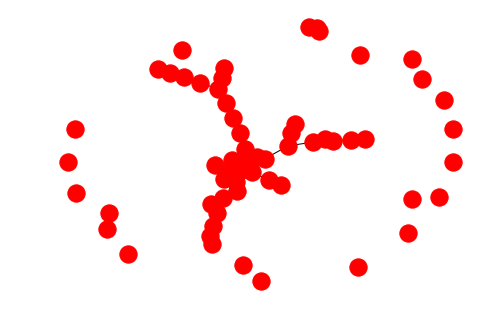

In [25]:
nx.draw(ssi_sixtyoney_sub_nx)

In [26]:
# display(d.bdp.sample(5).T)

In [27]:
dbp_keys_df = d.bdp[[
    'RECORD KEY', 'OFFICE TYPE', 'HEAD OFFICE KEY',
    'LEGAL TYPE',
    'LEGAL PARENT KEY',
    'GROUP TYPE',
    'GROUP PARENT KEY',
    'INSTITUTION NAME',
    'COUNTRY NAME',
    'ISO COUNTRY CODE',
]]

In [28]:
len(d.ssi['BIC OWNER'].drop_duplicates())

17117

In [29]:
len(d.ssi['RECORD KEY BDP OWNER'].drop_duplicates())

17117

In [30]:
len(d.ssi[['BIC OWNER', 'RECORD KEY BDP OWNER']].drop_duplicates())

17117

In [31]:
display(d.ssi.sample(5).T)

,280769,85416,381808,547510,426818
MODIFICATION FLAG,A,A,A,A,A
RECORD KEY,SI0000016XWP,SI000001E60M,SI000000JH1P,SI000000TOEJ,SI0000015LAM
BIC OWNER,BAPPIT21095,CLYDGB21704,SOLADEST470,GENODEF1GRT,DEUTDE8E848
INSTITUTION NAME OWNER,BANCO BPM SPA,CLYDESDALE BANK PLC,BADEN-WUERTTEMBERGISCHE BANK (TRADING AS LANDE...,RAIFFEISENBANK GRAINET EG,DEUTSCHE BANK AG
CITY OWNER,MILANO,OBAN,TUEBINGEN,GRAINET,SAALFELD
ISO COUNTRY CODE OWNER,IT,GB,DE,DE,DE
ISO CURRENCY CODE,HKD,USD,KWD,CNY,CZK
ASSET CATEGORY,COPA,ANYY,FOEX,MMKT,FOEX
BIC ACCOUNT HOLDING INSTITUTION,BAPPIT22XXX,CLYDGB2SXXX,NBOKKWKWXXX,COMMCNSHXXX,DEUTDEFFXXX
INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,BANCO BPM SPA,CLYDESDALE BANK PLC,NATIONAL BANK OF KUWAIT S.A.K.P.,BANK OF COMMUNICATIONS,DEUTSCHE BANK AG


In [32]:
display(ssi_keys_df.sample(5))

,BIC OWNER,BIC ACCOUNT HOLDING INSTITUTION,ACCOUNT HOLDING INSTITUTION TYPE
44849,NOLADE21NOS,NOLADE2HXXX,LOCAL CORRESPONDENT
542726,GENODEF1COP,BIMEMXMMXXX,CORRESPONDENT
321702,SISLISREXXX,CRESCHZZXXX,CORRESPONDENT
538580,BNPASGSGXXX,DABADKKKXXX,CORRESPONDENT
177734,MPBLPKKA079,BOTKJPJTXXX,CORRESPONDENT


In [33]:
dbp_keys_df.assign(parent = lambda x: np.where(
    x['HEAD OFFICE KEY'].isna(),
    x['GROUP PARENT KEY'],
    x['HEAD OFFICE KEY']
))

,RECORD KEY,OFFICE TYPE,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION NAME,COUNTRY NAME,ISO COUNTRY CODE,parent
0,BD000000DAMC,FB,BD000000DAMD,B,BD000000DAMD,Member,BD000000DAMD,BANCO DI CARIBE N.V. BONAIRE,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DAMD
1,BD000000DBB1,HO,BD000000DBB1,L,BD000000DBB1,Member,BD000000DBB2,MADURO AND CURIEL'S BANK (BONAIRE) NV,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBB1
2,BD000000DBES,FB,BD000000DBET,B,BD000000DBET,Member,BD000000DBET,ORCO BANK N.V. BONAIRE,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBET
3,BD000000I8PJ,FB,BD000000DBH8,B,BD000000DBH8,Member,BD00000037HJ,RBC ROYAL BANK N.V.(FORMERLY RBTT BANK N.V.),"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBH8
4,BD000000I8Q5,SF,BD000000DBH8,B,BD000000I8PJ,Member,BD00000037HJ,RBC ROYAL BANK N.V. (FORMERLY RBTT BANK N.V.),"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBH8
5,BD000000KZ2G,HO,BD000000KZ2G,L,BD000000KZ2G,NaN,NaN,BANCO DEL ORINOCO N.V.,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000KZ2G
6,BD000000DAGW,HO,BD000000DAGW,L,BD000000DAGW,NaN,NaN,ABB INVESTMENT N.V.,CURACAO,CW,BD000000DAGW
7,BD000000DAGY,HO,BD000000DAGY,L,BD000000DAGY,NaN,NaN,ABN-AMRO TRUST COMPANY,CURACAO,CW,BD000000DAGY
8,BD000000DAKS,HO,BD000000DAKS,L,BD000000DAKS,NaN,NaN,BANCO ALIADO INTERNACIONAL NV,CURACAO,CW,BD000000DAKS
9,BD000000DAKV,HO,BD000000DAKV,L,BD000000DAKV,NaN,NaN,BANCO MERCANTIL,CURACAO,CW,BD000000DAKV


In [34]:
display(dbp_keys_df.sample(5))

,RECORD KEY,OFFICE TYPE,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION NAME,COUNTRY NAME,ISO COUNTRY CODE
985896,BD0000009FB5,DB,BD0000001HAX,B,BD0000001HAX,NaN,NaN,Sparebank 1 Nordvest,NORWAY,NO
413783,BD00000068MH,DB,BD0000000O3T,B,BD0000000O3T,Member,BD0000001TZR,BANQUE COURTOIS,FRANCE,FR
1016503,BD00000109HV,HO,BD00000109HV,L,BD00000109HV,Parent,BD00000109HV,INTERNATIONAL UNION BANK LLC,PUERTO RICO,PR
1096465,BD000000ALM8,DB,BD0000010MQ8,B,BD0000010MQ8,Member,BD0000010T9N,"Bank of America, National Association",UNITED STATES OF AMERICA,US
577690,BD000000HNUI,DB,BD0000001RR8,B,BD0000001RR8,Member,BD0000001RR8,STATE BANK OF INDIA,INDIA,IN


### By Head Office

In [35]:
ssi_dbp_df = d.ssi[[
    'RECORD KEY BDP OWNER',
    'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
]].merge(
    dbp_keys_df[[
        'RECORD KEY',
        'HEAD OFFICE KEY',
    ]].rename(columns = {
        'HEAD OFFICE KEY' : 'OWNER HEAD OFFICE KEY'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP OWNER',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY']).merge(
    dbp_keys_df[[
        'RECORD KEY',
        'HEAD OFFICE KEY',
    ]].rename(columns = {
        'HEAD OFFICE KEY' : 'HOLDER HEAD OFFICE KEY'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY'])

In [36]:
len(ssi_dbp_df)

672484

In [37]:
display(ssi_dbp_df.sample(5))

,RECORD KEY BDP OWNER,RECORD KEY BDP ACCOUNT HOLDING INSTITUTION,OWNER HEAD OFFICE KEY,HOLDER HEAD OFFICE KEY
10608,BD000000E33Z,BD0000003PRO,BD0000000TPA,BD0000003PRO
153216,BD0000000WAW,BD0000000WB8,BD0000000WB8,BD0000000WB8
416244,BD0000000JK5,BD000000O237,BD0000000JK5,BD000000O237
510289,BD0000000YJ1,BD000000SO2O,BD0000000YJ1,BD000000SO2O
16739,BD0000000RU2,BD0000003PRO,BD0000003PRO,BD0000003PRO


In [38]:
len(ssi_dbp_df['RECORD KEY BDP OWNER'].drop_duplicates())

17117

In [39]:
len(ssi_dbp_df['OWNER HEAD OFFICE KEY'].drop_duplicates())

8110

In [40]:
len(ssi_dbp_df['RECORD KEY BDP ACCOUNT HOLDING INSTITUTION'].drop_duplicates())

4296

In [41]:
len(ssi_dbp_df['HOLDER HEAD OFFICE KEY'].drop_duplicates())

2667

In [42]:
head_office_ssi_nx = nx.from_pandas_edgelist(
    ssi_dbp_df[[
        'OWNER HEAD OFFICE KEY',
        'HOLDER HEAD OFFICE KEY'
    ]].drop_duplicates(),
    source = 'OWNER HEAD OFFICE KEY',
    target = 'HOLDER HEAD OFFICE KEY'
)

In [43]:
print(nx.info(head_office_ssi_nx))

Name: 
Type: Graph
Number of nodes: 8283
Number of edges: 102125
Average degree:  24.6589


In [44]:
print(nx.info(ssi_nx))

Name: 
Type: Graph
Number of nodes: 17783
Number of edges: 167510
Average degree:  18.8393


### By Country

In [45]:
ssi_dbp_country_df = d.ssi[[
    'RECORD KEY BDP OWNER',
    'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
]].merge(
    dbp_keys_df[[
        'RECORD KEY',
        'COUNTRY NAME',
    ]].rename(columns = {
        'COUNTRY NAME' : 'OWNER COUNTRY NAME'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP OWNER',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY']).merge(
    dbp_keys_df[[
        'RECORD KEY',
        'COUNTRY NAME',
    ]].rename(columns = {
        'COUNTRY NAME' : 'HOLDER COUNTRY NAME'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY'])

In [46]:
len(ssi_dbp_country_df)

672484

In [47]:
display(ssi_dbp_country_df.sample(5))

,RECORD KEY BDP OWNER,RECORD KEY BDP ACCOUNT HOLDING INSTITUTION,OWNER COUNTRY NAME,HOLDER COUNTRY NAME
529331,BD0000000MW2,BD0000001CFB,CZECHIA,GERMANY
386079,BD0000000Z2S,BD00000025RK,GERMANY,RUSSIAN FEDERATION
114294,BD00000009XJ,BD000000QXIU,GERMANY,JAPAN
574460,BD00000019KG,BD0000001WYZ,YEMEN,YEMEN
79746,BD0000001NJP,BD0000000UG0,NORWAY,NORWAY


In [48]:
len(ssi_dbp_country_df['OWNER COUNTRY NAME'].drop_duplicates())

224

In [49]:
len(ssi_dbp_country_df['HOLDER COUNTRY NAME'].drop_duplicates())

198

In [50]:
country_ssi_nx = nx.from_pandas_edgelist(
    ssi_dbp_country_df[[
        'OWNER COUNTRY NAME',
        'HOLDER COUNTRY NAME'
    ]].drop_duplicates(),
    source = 'OWNER COUNTRY NAME',
    target = 'HOLDER COUNTRY NAME'
)

In [51]:
print(nx.info(country_ssi_nx))

Name: 
Type: Graph
Number of nodes: 224
Number of edges: 4757
Average degree:  42.4732


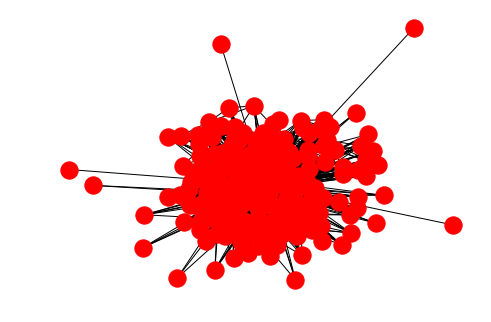

In [124]:
nx.draw_spring(country_ssi_nx)

In [103]:
from pyvis.network import Network

In [119]:
nt = Network(
    "500px",
    "1000px",
    notebook = True,
    bgcolor="#222222", font_color="white"
)

In [122]:
nt.repulsion(
    node_distance = 120,
#     gravitational_constant = -18350,
    central_gravity = 0.0,
    spring_length = 18995,
    spring_strength = 0.4,
    damping = 0.16
)
nt.set_edge_smooth('continuous')
nt.show_buttons(filter_=['physics', 'edges'])

In [123]:
nt.from_nx(country_ssi_nx)
nt.show("nx.html")

In [92]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


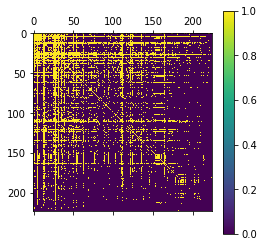

In [132]:
plt.matshow(nx.adjacency_matrix(country_ssi_nx).toarray());
plt.colorbar()
plt.show()

In [108]:
display(nx.adjacency_matrix(country_ssi_nx).toarray())

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 